In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from PIL import Image
import sys
from keras.models import model_from_json

In [2]:
try:
    sys.modules['Image'] = Image 
    print("Pillow is imported correctly.")
except ImportError as e:
    print("Pillow is not installed correctly:", e)

Pillow is imported correctly.


In [3]:
try:
    img = Image.open('D:/emotion_detection/test/angry/PrivateTest_88305.jpg')  # Replace with a valid image path
    img.show()
    print("Image loaded successfully with Pillow.")
except Exception as e:
    print("Error loading image with Pillow:", e)

Image loaded successfully with Pillow.


In [4]:
print(sys.executable)

C:\Program Files\Python312\python.exe


In [5]:
TRAIN_DIR = 'D:/emotion_detection/train'
TEST_DIR = 'D:/emotion_detection/test'

In [6]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [35]:
train = train[:1000]

In [36]:
print(train)

                                                 image  label
0    D:/emotion_detection/train\angry\Training_1011...  angry
1    D:/emotion_detection/train\angry\Training_1012...  angry
2    D:/emotion_detection/train\angry\Training_1013...  angry
3    D:/emotion_detection/train\angry\Training_1016...  angry
4    D:/emotion_detection/train\angry\Training_1021...  angry
..                                                 ...    ...
995  D:/emotion_detection/train\angry\Training_3240...  angry
996  D:/emotion_detection/train\angry\Training_3244...  angry
997  D:/emotion_detection/train\angry\Training_3244...  angry
998  D:/emotion_detection/train\angry\Training_3244...  angry
999  D:/emotion_detection/train\angry\Training_3245...  angry

[1000 rows x 2 columns]


In [37]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [39]:
test = test[:100]
print(test)
print(test['image'])

                                                image  label
0   D:/emotion_detection/test\angry\PrivateTest_10...  angry
1   D:/emotion_detection/test\angry\PrivateTest_10...  angry
2   D:/emotion_detection/test\angry\PrivateTest_10...  angry
3   D:/emotion_detection/test\angry\PrivateTest_10...  angry
4   D:/emotion_detection/test\angry\PrivateTest_11...  angry
..                                                ...    ...
95  D:/emotion_detection/test\angry\PrivateTest_27...  angry
96  D:/emotion_detection/test\angry\PrivateTest_27...  angry
97  D:/emotion_detection/test\angry\PrivateTest_27...  angry
98  D:/emotion_detection/test\angry\PrivateTest_27...  angry
99  D:/emotion_detection/test\angry\PrivateTest_27...  angry

[100 rows x 2 columns]
0     D:/emotion_detection/test\angry\PrivateTest_10...
1     D:/emotion_detection/test\angry\PrivateTest_10...
2     D:/emotion_detection/test\angry\PrivateTest_10...
3     D:/emotion_detection/test\angry\PrivateTest_10...
4     D:/emotion_det

In [40]:
from tqdm.notebook import tqdm

In [41]:
# def extract_features(images):
#     features = []
#     for image in tqdm(images):
#         img = load_img(image,grayscale =  True )
#         img = np.array(img)
#         features.append(img)
#     features = np.array(features)
#     features = features.reshape(len(features),48,48,1)
#     return features
try:
    sys.modules['Image'] = Image 
    print("Pillow is imported correctly.")
except ImportError as e:
    print("Pillow is not installed correctly:", e)
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

Pillow is imported correctly.


In [42]:
train_features = extract_features(train['image']) 

  0%|          | 0/1000 [00:00<?, ?it/s]

In [44]:
test_features = extract_features(test['image'])

  0%|          | 0/100 [00:00<?, ?it/s]

In [45]:
x_train = train_features/255.0
x_test = test_features/255.0

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [48]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [49]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [50]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))


C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 25, validation_data = (x_test,y_test)) 

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.7379 - loss: 0.6374 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 1.0000 - loss: 0.000

In [1]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

NameError: name 'model' is not defined

In [3]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [4]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [5]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [6]:
image = 'D:/emotion_detection/train/sad/Training_2913.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
model prediction is  angry


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
model prediction is  angry


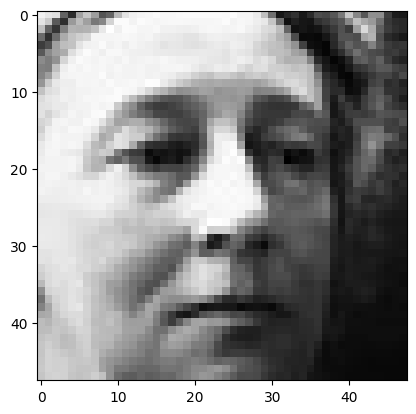

In [8]:
image = 'D:/emotion_detection/train/sad/Training_2913.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
model prediction is  angry


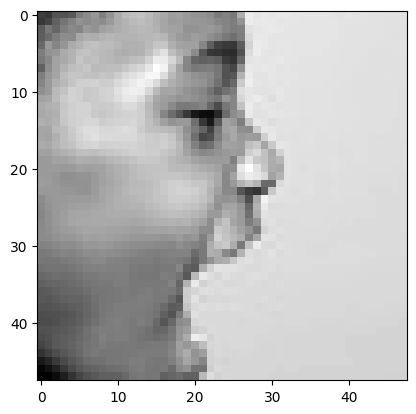

In [11]:
image = 'D:/emotion_detection/train/fear/Training_144853.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
model prediction is  angry


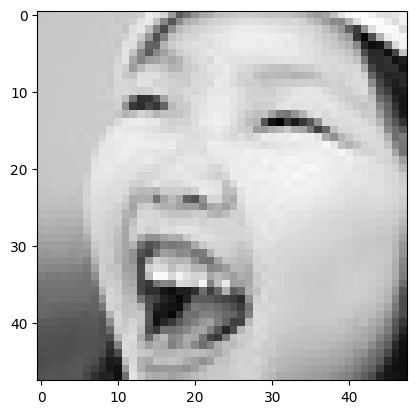

In [12]:
image = 'D:/emotion_detection/train/happy/Training_50580.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')